This notebook explores an alternative approach to finding the optimal <code>k</code> in k-means clustering. The idea is to minimise the area/volume covered by the disks/n-dimensional balls that contain the clusters.

Overall, this works quite well. Towards the end of this notebook, some problems will become apparent -- those are issues in my implemementation of k-means clustering (--> to be fixed).

In [1]:
import numpy as np
from clustering_easy_k_optimisation import *
import matplotlib.pyplot as plt
%matplotlib inline
m=1000

## Generate data

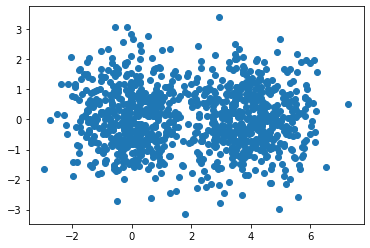

In [2]:
offset = np.zeros((m,2))
x_shift = np.random.choice([0,4], (m,))
offset[:,0] = x_shift
data = sample_from_unit_ball(m,2, mode='normal') + offset
plt.scatter(data[:,0], data[:,1])

## Clustering

In [3]:
class_dict, centroids_dict, vol_dict, sse_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 2
k=3: Stopped clustering after iteration 16
k=4: Stopped clustering after iteration 10
k=5: Stopped clustering after iteration 30
k=6: Stopped clustering after iteration 24
k=7: Stopped clustering after iteration 34
k=8: Stopped clustering after iteration 33
k=9: Stopped clustering after iteration 27


In [4]:
vol_dict

{'k=1': 89.71067970171228,
 'k=2': 82.62283671200942,
 'k=3': 100.29854747653351,
 'k=4': 101.38440082510843,
 'k=5': 111.89321804635694,
 'k=6': 122.13415503327974,
 'k=7': 122.0628377677896,
 'k=8': 123.13381487627352,
 'k=9': 138.67208552760866}

Looking at the volumes suggests that <code>k=2</code> (smallest volume) is the best number of clusters (see below for more explanation of the 'volume' metric).

From the sum of squared errors (sse; sum of squared distance or all points to their centroids), one can't immediately read off the best value, but the elbow method tells us to look for the kink in the graph (this will be done later, for an example with higher value of <code>k</code>.)

In [5]:
sse_dict

{'k=1': 6104.834016539683,
 'k=2': 2029.6971446975504,
 'k=3': 1632.2432512282794,
 'k=4': 1366.1745007236677,
 'k=5': 1074.5403096939451,
 'k=6': 881.899127138306,
 'k=7': 786.6723267035657,
 'k=8': 712.8571536574058,
 'k=9': 636.1868116592434}

## Visualise results

Text(0.5, 1.0, 'k=1')

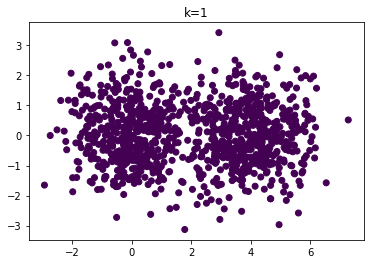

In [6]:
key='k=1'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=2')

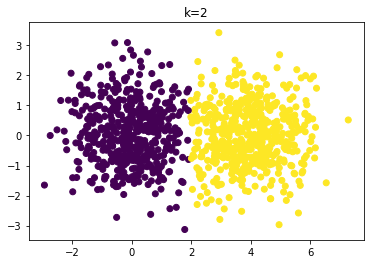

In [7]:
key='k=2'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=3')

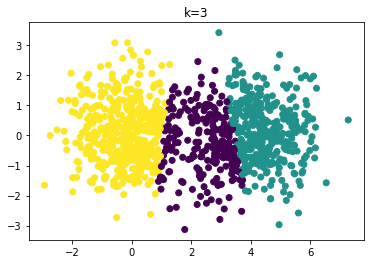

In [8]:
key='k=3'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=4')

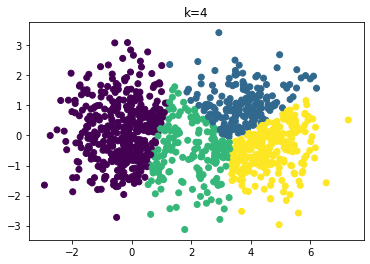

In [9]:
key='k=4'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=5')

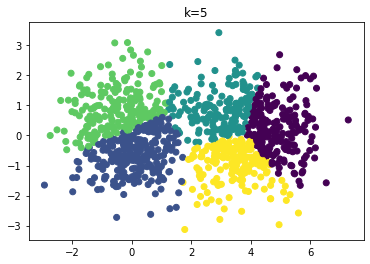

In [10]:
key='k=5'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=6')

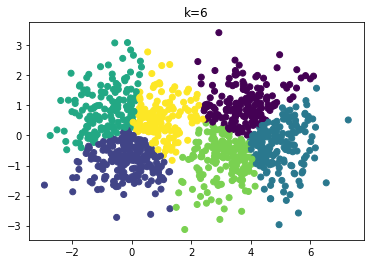

In [11]:
key='k=6'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

## Explanation of 'volume'

The metric 'volume' that was used here is simply the sum of the volumes of the disks (in general: n-dimensional balls) centred at the class centres (centroids) that contain all members of that class. E.g., in the above plots: Two disks containing each of the clusters are the most efficient way to cover all points. One large disk (k=1) would contain too much whitespace and many smaller disks (k>2) have too much overlap.

It seems that the 'volume' used above can help to find the best value for <code>k</code>. However, that probably doesn't always work well -- perhaps only when the groups in the distribution of the data are well-defined. This can be explored below. I'll only demonstrate a case that works well, but other situation can be tried afterwards.

## Another low-dimensional experiment

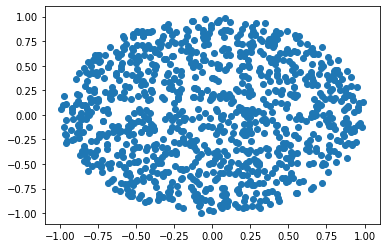

In [12]:
# just to test that sampling is uniform across the disk
data = sample_from_unit_ball(m, 2, mode='uniform')
plt.scatter(data[:,0], data[:,1])

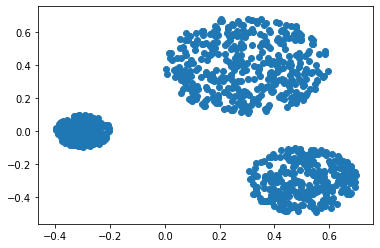

In [13]:
data1 = np.array([[-0.3,0]]) + 0.1 * sample_from_unit_ball(int(m*0.2), 2, mode='uniform')
data2 = np.array([[0.5,-0.3]]) + 0.2 * sample_from_unit_ball(int(m*0.3), 2, mode='uniform')
data3 = np.array([[0.3,0.4]]) + 0.3 * sample_from_unit_ball(int(m*0.4), 2, mode='uniform')
data = np.concatenate((data1, data2, data3), axis=0)
plt.scatter(data[:,0],data[:,1])

In [14]:
class_dict, _, vol_dict, sse_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 6
k=3: Stopped clustering after iteration 2
k=4: Stopped clustering after iteration 12
k=5: Stopped clustering after iteration 23
k=6: Stopped clustering after iteration 10
k=7: Stopped clustering after iteration 19
k=8: Stopped clustering after iteration 13
k=9: Stopped clustering after iteration 13


In [15]:
vol_dict

{'k=1': 1.3605853210192296,
 'k=2': 1.2084965460508799,
 'k=3': 0.45876780223952723,
 'k=4': 0.7609994150194288,
 'k=5': 0.8988314807225714,
 'k=6': 0.9350029858130474,
 'k=7': 0.9382712050163878,
 'k=8': 0.6273844137210628,
 'k=9': 0.7513452789003541}

Text(0.5, 1.0, 'Look for the elbow!')

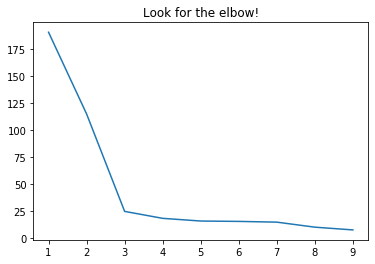

In [16]:
plt.plot(list(range(1,10)), list(sse_dict.values()))
plt.title('Look for the elbow!')

Text(0.5, 1.0, 'k=3')

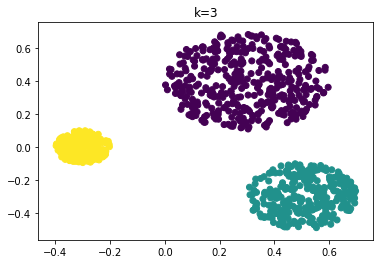

In [17]:
key='k=3'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

But this doesn't always work as well, cf below.

## High-dimensional example

The example here doesn't always work, but sometimes it does!

Text(0.5, 1.0, 'A projection of the highdimensional data')

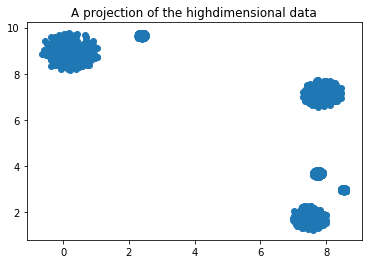

In [18]:
num = 1000
dim = 5
size = 10  # size of the cube 
num_blobs = 6

def generate_blob():
    return size * np.random.rand(1,dim) + np.random.rand() * sample_from_unit_ball(int(num*np.random.rand()),
                                                                                   dim, mode='uniform')

data = generate_blob()
for i in range(num_blobs-1):
    data = np.concatenate((data, generate_blob()), axis=0)

plt.scatter(data[:,0],data[:,1])
plt.title('A projection of the highdimensional data')

In [19]:
class_dict, _, vol_dict, dist_sum_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 2
k=3: Stopped clustering after iteration 2
k=4: Stopped clustering after iteration 3
k=5: Stopped clustering after iteration 15
k=6: Stopped clustering after iteration 2
k=7: Stopped clustering after iteration 32
k=8: Stopped clustering after iteration 18
k=9: Stopped clustering after iteration 23


Text(0.5, 1.0, 'k=6')

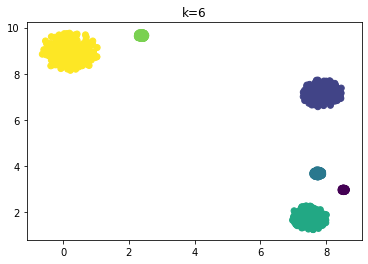

In [20]:
key='k=' + str(num_blobs)
plt.scatter(data[:,0], data[:,1] ,c=class_dict[key])
plt.title(key)

In [21]:
vol_dict

{'k=1': 194885.3308980109,
 'k=2': 209303.41808040877,
 'k=3': 72230.81876961757,
 'k=4': 9865.441740864506,
 'k=5': 125107.60414157576,
 'k=6': 3.5931833410466725,
 'k=7': 102.10072561806516,
 'k=8': 3.5937220113932784,
 'k=9': 6.554681772475374}

# Comparsion to scikit-learn

CPU times: user 700 ms, sys: 108 ms, total: 808 ms
Wall time: 475 ms


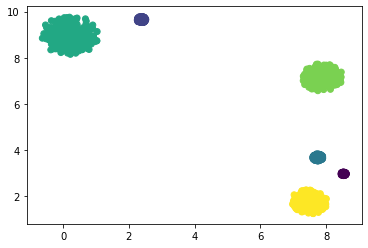

In [22]:
%%time
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_blobs).fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)

k=6: Stopped clustering after iteration 26
CPU times: user 4.2 s, sys: 476 ms, total: 4.68 s
Wall time: 1.66 s


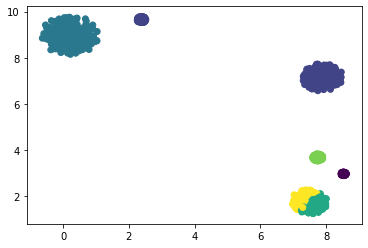

In [23]:
%%time
classes, _, _, _ = clustering_fixed_k(data, num_blobs)
plt.scatter(data[:,0], data[:,1], c=classes)

# To-do

It doesn't always work (in fact, quite often, it doesn't). There's an issue in my implementation of k-means clustering --> figure out where this is coming from; it may be the way orphaned centroids are currently handled.